In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from google.colab import drive
drive.mount('/content/drive')

df= pd.read_csv('/content/drive/My Drive/Dataset/train.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
if len(df.select_dtypes('int').columns) == df.shape[1]:
    print("All int values!")
else:
    print("Few non-int values!")

All int values!


In [ ]:
print("Number of Observations are {0} while number of features are {1} ".format(df.shape[0],df.shape[1]))

Number of Observations are 42000 while number of features are 785 


In [ ]:
covv = np.cov(df.T)#transpose matrix

In [ ]:
covv.shape

(785, 785)

In [ ]:
eigenvalues, eigenvectors=np.linalg.eig(covv)

In [ ]:
print("EIGENVALUES")
print(eigenvalues)
print("EIGENVECTORS")
print(eigenvectors)

EIGENVALUES
[ 3.34780807e+05+0.00000000e+00j  2.45887077e+05+0.00000000e+00j
  2.11051680e+05+0.00000000e+00j  1.84726586e+05+0.00000000e+00j
  1.68070910e+05+0.00000000e+00j  1.47773324e+05+0.00000000e+00j
  1.12534620e+05+0.00000000e+00j  9.93154695e+04+0.00000000e+00j
  9.50160154e+04+0.00000000e+00j  8.06607863e+04+0.00000000e+00j
  7.20912849e+04+0.00000000e+00j  7.07066235e+04+0.00000000e+00j
  5.84662680e+04+0.00000000e+00j  5.81306730e+04+0.00000000e+00j
  5.42962960e+04+0.00000000e+00j  5.09347700e+04+0.00000000e+00j
  4.53185061e+04+0.00000000e+00j  4.40491239e+04+0.00000000e+00j
  4.07953624e+04+0.00000000e+00j  3.95859262e+04+0.00000000e+00j
  3.68192832e+04+0.00000000e+00j  3.48621615e+04+0.00000000e+00j
  3.31350624e+04+0.00000000e+00j  3.13473284e+04+0.00000000e+00j
  3.04817759e+04+0.00000000e+00j  2.88034394e+04+0.00000000e+00j
  2.78793695e+04+0.00000000e+00j  2.66963019e+04+0.00000000e+00j
  2.54335827e+04+0.00000000e+00j  2.35801040e+04+0.00000000e+00j
  2.25952505e

In [ ]:
idx=eigenvalues.argsort()[::-1]
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  61,  60,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        92,  91,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 127, 129,
       130, 131, 132, 133, 135, 136, 137, 134, 138, 139, 140, 142, 141,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 156, 153,
       152, 157, 158, 159, 160, 161, 162, 164, 165, 163, 166, 167, 168,
       169, 170, 171, 172, 173, 176, 175, 174, 179, 180, 178, 17

In [ ]:
target = df['label']
# Drop the label feature
train = df.drop("label",axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

In [ ]:
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[idx]

In [ ]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(785,)
(785, 785)


In [ ]:
eigenvalues[:3]

array([334780.80699535+0.j, 245887.07746082+0.j, 211051.67963459+0.j])

In [ ]:
eigenvectors[:3]

array([[0.00080233+0.j, 0.00286081+0.j, 0.00049945+0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j]])

In [ ]:
variance_explained=[]
for i in eigenvalues:
  variance_explained.append((i/sum(eigenvalues))*100)

In [ ]:
print(variance_explained)

[(9.74892029123122+0j), (7.1603074869303205+0j), (6.1458899647035565+0j), (5.379295124644153+0j), (4.894276712660098+0j), (4.303204756761393+0j), (3.2770428108188976+0j), (2.8920970858915784+0j), (2.766895656288452+0j), (2.348866958426939+0j), (2.0993204360766233+0j), (2.0589986694196987+0j), (1.702555744344033+0j), (1.692783116785315+0j), (1.5811248760672885+0j), (1.483236203597425+0j), (1.319688867359878+0j), (1.2827240653224592+0j), (1.1879735279693886+0j), (1.1527543720103377+0j), (1.072188875129529+0j), (1.0151968897020693+0j), (0.9649032312773069+0j), (0.9128438642938013+0j), (0.8876387083447181+0j), (0.8387650348927845+0j), (0.8118558322984822+0j), (0.7774045406253361+0j), (0.7406337673350719+0j), (0.686659897969969+0j), (0.6579806598353085+0j), (0.6387982739282572+0j), (0.5993655622986374+0j), (0.5889127946254821+0j), (0.5643338096012042+0j), (0.5409658714817792+0j), (0.5092209273702188+0j), (0.48750380376651536+0j), (0.4755682676195436+0j), (0.46654359148195457+0j), (0.4529519

In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained[:1])

[9.74892029+0.j]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0.5, 1.0, 'Explained variance vs Number of components')

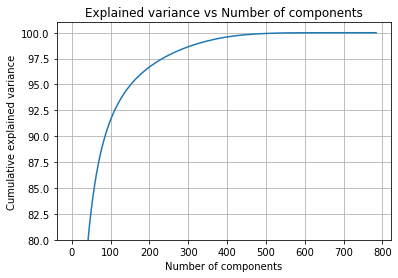

In [ ]:
plt.plot(cumulative_variance_explained)
plt.ylim([80,101])
plt.grid()
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [ ]:
digit = np.linalg.inv(eigenvectors) @ df.T
digit = pd.DataFrame(digit.T)
digit.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,-319.704239+0.000000j,-312.929922-0.000000j,-335.889812-0.000000j,-381.293002-0.000000j,415.968623-0.000000j,-357.401326-0.000000j,-30.988032+0.000000j,-177.249076+0.000000j,489.884215+0.000000j,-242.129843+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
1,-1920.596994-0.000000j,-376.042527+0.000000j,197.359038+0.000000j,-282.270008-0.000000j,982.101723+0.000000j,-456.420275+0.000000j,876.291429-0.000000j,208.602176-0.000000j,380.635503-0.000000j,-53.579699-0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
2,-194.350189+0.000000j,-106.010694-0.000000j,-3.4276150-0.0000000j,-167.526504-0.000000j,393.412751-0.000000j,157.338021-0.000000j,530.305603+0.000000j,131.177805+0.000000j,189.880645+0.000000j,-145.776409+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
3,-375.985585-0.000000j,9.3600620-0.0000000j,-69.810645-0.000000j,161.999116+0.000000j,344.960422-0.000000j,-263.565764+0.000000j,264.959672-0.000000j,-33.718185-0.000000j,382.131523-0.000000j,-38.117176-0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
4,-2007.715802-0.000000j,-404.143528+0.000000j,105.307148+0.000000j,-434.989002+0.000000j,1043.564328+0.000000j,-585.906557+0.000000j,941.996801-0.000000j,57.663496-0.000000j,412.416207-0.000000j,20.612149-0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j


In [ ]:
100 * np.var(digit) / sum(np.var(digit))

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:48: ComplexWarning:

Casting complex values to real discards the imaginary part



0      4.154063
1      2.623051
2      2.286348
3      2.709459
4      1.582520
         ...   
780    0.007064
781    0.000000
782    0.000000
783    0.099737
784    0.000000
Length: 785, dtype: float64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA( random_state=42)
pca

PCA(random_state=42)

In [ ]:
pca.fit(df)

PCA(random_state=42)

In [ ]:
p=pca.fit(df)

In [ ]:
pca.components_

array([[-8.02331972e-04,  5.55111512e-17, -1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.86080795e-03,  1.11022302e-16,  5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.99446269e-04,  0.00000000e+00,  2.08166817e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -1.12853219e-01,  1.66351761e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.18630473e-02, -5.55242886e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  6.98476478e-02, -3.47823569e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
pca.explained_variance_ratio_[0]

0.0974892029123123

PCA as dimensionality reduction

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (42000, 784)
transformed shape: (42000, 1)


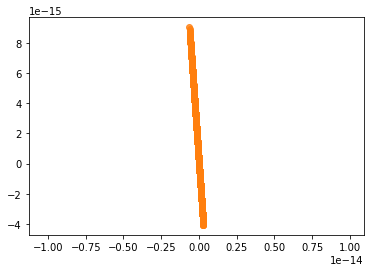

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(df)
print(df.shape)
print(projected.shape)

(42000, 785)
(42000, 2)


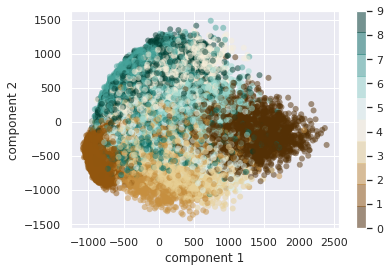

In [ ]:
import seaborn as sns; sns.set()
plt.scatter(projected[:, 0], projected[:, 1],c=target, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('BrBG', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();